**Installing and Importing required Libraries**


In [1]:
!pip install bayesian-optimization
!pip install catboost
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.5 MB/s eta 0:00:00


In [2]:
# basics
from IPython import get_ipython
get_ipython().magic('reset -sf')
import pandas as pd
import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
from glob import glob
import os
plt.style.use('ggplot')
from bayes_opt import BayesianOptimization
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# preprocess
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import PowerTransformer

# Classifier Libraries
import collections
from lightgbm import LGBMClassifier

# preprocess
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn import under_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import collections
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import catboost as cgb
from functools import partial

#keras
import tensorflow.keras.initializers
import tensorflow.keras
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
import statistics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, InputLayer
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling

# imbalanced
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced

# evalue
from numpy import mean
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import log_loss
#from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import SCORERS
from sklearn.metrics import classification_report, f1_score
#from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

# warning
import warnings
warnings.filterwarnings("ignore")


**Importing and preprocessing data**

Dataset : https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
from google.colab import drive

drive.mount('/content/drive')

#!ls 'drive/My Drive'

Mounted at /content/drive


In [4]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Dissertation/creditcard.csv')
print("Full dataset has",data.shape[0], "rows and", data.shape[1], "columns")

Full dataset has 284807 rows and 31 columns


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd


# Data Cleaning
# Remove rows with missing values
data_cleaned = data.dropna()

# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Prepare data for RFE
X = data_cleaned.drop('Class', axis=1)
y = data_cleaned['Class']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a model for RFE
model = LogisticRegression()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=10)  # Select the desired number of features

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_feature_indices = rfe.support_
selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:", selected_feature_names,)


Selected Features: Index(['V4', 'V8', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V26', 'V27'], dtype='object')


In [48]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X_train, y_train are your training data
k = 10  # Number of top features to select
# Data Cleaning
# Remove rows with missing values
data_cleaned = data.dropna()

# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Prepare data
X = data_cleaned.drop('Class', axis=1)
y = data_cleaned['Class']
# Initialize SelectKBest with ANOVA F-value as score function
selector = SelectKBest(score_func=f_classif, k=k)

# Splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit selector on training data and transform the data
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of selected features
selected_feature_indices = selector.get_support(indices=True)

# Subset the original feature names based on selected indices
selected_feature_names = X_train.columns[selected_feature_indices]

# Use the selected features in your further analysis


In [49]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [50]:
print(selected_feature_names)

Index(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')


In [51]:
print(y_train.shape, y_test.shape)

(198608,) (42559,)


In [52]:
X_train_n = X_train[selected_feature_names]
X_test_n = X_test[selected_feature_names]

In [53]:
X_train_n = X_train_n.values
y_train = y_train.values
X_test_n = X_test_n.values
y_test = y_test.values

In [54]:
n_timesteps = 1
n_features = 10
X_train_new = X_train_n.reshape(-1,1, n_features)
#X_train_new = X_train_resampled_loaded.reshape(-1,1, n_features)
#n_samples = y_train_resampled_loaded.shape[0]
y_train_new = y_train.reshape(-1, 1, 1)
#y_train_new = y_train_resampled_loaded.reshape(n_samples, 1, 1)
print(X_train_new.shape , y_train_new.shape)
X_test_new = X_test_n.reshape(-1,1,n_features)
y_test_new = y_test.reshape(-1,1,1)
#X_test_new = X_test_resampled.reshape(-1,1,n_features)
#y_test_new = y_test_resampled.reshape(-1,1,1)
print(X_test_new.shape , y_test_new.shape)

(198608, 1, 10) (198608, 1, 1)
(42559, 1, 10) (42559, 1, 1)


In [ ]:
# @title Model Considered
from keras.layers import *
from keras.optimizers import Adagrad,Adam, Nadam, Adadelta, RMSprop, SGD
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score
from bayes_opt import BayesianOptimization
from tensorflow.keras.losses import BinaryCrossentropy
from keras.regularizers import l1,l2

import warnings
warnings.filterwarnings("ignore")

from keras import backend as K
from sklearn.utils import class_weight
def build_model_2(neuron_layer1, neuron_layer2, neuron_layer3, neuron_layer4, neuron_layer5,
                  dropout1 = 0.0, dropout2 = 0.0, dropout3 = 0.0, dropout4 = 0.0, regularization = None):
    model2 = Sequential([
        InputLayer(input_shape=(10, 1)),
        Conv1D(int(neuron_layer1), kernel_size=3, activation='relu', kernel_regularizer=regularization),
        BatchNormalization(),
        MaxPooling1D(pool_size=2, padding='valid'),
        Dropout(dropout1),
        Conv1D(int(neuron_layer2), kernel_size=3, activation='relu', kernel_regularizer=regularization),
        BatchNormalization(),
        MaxPooling1D(pool_size=2, padding='valid'),
        Dropout(dropout2),
        GRU(int(neuron_layer3), return_sequences=True, activation='relu'),
        BatchNormalization(),
        Dropout(dropout3),
        GRU(int(neuron_layer4), activation='relu'),
        BatchNormalization(),
        Dropout(dropout4),
        Flatten(),
        Dense(int(neuron_layer5), activation='relu', kernel_regularizer=regularization),
        Dense(1, activation='sigmoid')
    ])
    model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model2

pbounds3 = {
    'neuron_layer1': (10,500),
    'neuron_layer2': (10,500),
    'neuron_layer3': (10,500),
    'neuron_layer4': (10,500),
    'neuron_layer5': (10,500),
#    'dropout1': (0.05,0.5),
#    'dropout2': (0.05,0.5),
#    'dropout3': (0.05,0.5),
#    'dropout4': (0.05,0.5),
}
X_train_new_reshaped = X_train_new.reshape((X_train_new.shape[0], 10, 1))

def model_cv(neuron_layer1, neuron_layer2, neuron_layer3,neuron_layer4,neuron_layer5,  dropout1 = 0.2, dropout2 = 0.2, dropout3 = 0.2, dropout4 = 0.2):
    model = build_model_2(neuron_layer1, neuron_layer2,neuron_layer3,neuron_layer4,neuron_layer5, dropout1, dropout2, dropout3, dropout4,None)
    # Assuming you have X_train, y_train as the training data
    X_train_cv, X_val, y_train_cv, y_val = train_test_split(X_train_new_reshaped, y_train_new, test_size=0.2, random_state=42)
    model.fit(X_train_cv, y_train_cv, epochs=20, batch_size=8192, verbose=0)
#    val_loss = model.evaluate(X_test_new, y_test_new, verbose=0)[0]
    val_loss = model.evaluate(X_val, y_val, verbose=0)[0]
    return -val_loss  # Minimize the loss (negative of validation loss)
# Perform Bayesian Optimization
optimizer = BayesianOptimization(f=model_cv, pbounds=pbounds3, random_state=42)
optimizer.maximize(init_points=5, n_iter=10)

best_params = optimizer.max['params']
best_neuron_layer1 = int(best_params['neuron_layer1'])
best_neuron_layer2 = int(best_params['neuron_layer2'])
best_neuron_layer3 = int(best_params['neuron_layer3'])
best_neuron_layer4 = int(best_params['neuron_layer4'])
best_neuron_layer5 = int(best_params['neuron_layer5'])
#best_dropout1 = best_params['dropout_rate']
print(best_params,best_neuron_layer1,best_neuron_layer2,best_neuron_layer3,best_neuron_layer4,best_neuron_layer5)#,best_dropout_rate)
model_2 = build_model_2(int(best_neuron_layer1),int(best_neuron_layer2),int(best_neuron_layer3),int(best_neuron_layer4),int(best_neuron_layer5),0.2,0.2,0.2,0.2)#,float(best_dropout_rate))
#model2 = build_model_2()
#model2.compile(loss = BinaryCrossentropy(from_logits = True), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
#X_train_new_reshaped = X_train_standardized.reshape((X_train_new.shape[0], 30, 1))

#X_train_cv, X_val, y_train_cv, y_val = train_test_split(X_train_new_reshaped, y_train_new, test_size=0.2, random_state=42)
#es = EarlyStopping(monitor='val_loss', mode='min',patience=5)
#model2.fit(X_train_cv, y_train_cv, epochs=20,batch_size=500,validation_data=(X_val,y_val),shuffle=False, callbacks=[es])


In [55]:
def print_model(model):
    neurons_in_layers = []
    layer_types = []

    for i, layer in enumerate(model_2.layers):
        if isinstance(layer, Conv1D):
            neurons = layer.filters
            print(f"Layer {i + 1} - Type: Conv1D (Filters: {neurons}), Filters: {neurons}")
        elif hasattr(layer, 'units'):
            neurons = layer.units
            print(f"Layer {i + 1} - Type: {layer.__class__.__name__}, Neurons: {neurons}")
        elif isinstance(layer, Dropout):
            rate = layer.rate
            print(f"Layer {i + 1} - Type: Dropout (Rate: {rate}), Dropout Rate: {rate}")
        elif isinstance(layer, Flatten):
            print(f"Layer {i + 1} - Type: Flatten")
        else:
            print(f"Layer {i + 1} - Type: {layer.__class__.__name__}")


In [56]:
from keras.layers import *
from keras.optimizers import Adagrad,Adam, Nadam, Adadelta, RMSprop, SGD
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score
from bayes_opt import BayesianOptimization
from tensorflow.keras.losses import BinaryCrossentropy
from keras.regularizers import l1,l2
def build_model_2(neuron_layer1, neuron_layer2, neuron_layer3, neuron_layer4, neuron_layer5,
                  dropout1 = 0.0, dropout2 = 0.0, dropout3 = 0.0, dropout4 = 0.0, regularization = None):
    model2 = Sequential([
        InputLayer(input_shape=(10, 1)),
        Conv1D(int(neuron_layer1), kernel_size=3, activation='relu', kernel_regularizer=regularization),
        BatchNormalization(),
        MaxPooling1D(pool_size=2, padding='valid'),
        Dropout(dropout1),
        Conv1D(int(neuron_layer2), kernel_size=3, activation='relu', kernel_regularizer=regularization),
        BatchNormalization(),
        MaxPooling1D(pool_size=2, padding='valid'),
        Dropout(dropout2),
        GRU(int(neuron_layer3), return_sequences=True, activation='relu'),
        BatchNormalization(),
        Dropout(dropout3),
        GRU(int(neuron_layer4), activation='relu'),
        BatchNormalization(),
        Dropout(dropout4),
        Flatten(),
        Dense(int(neuron_layer5), activation='relu', kernel_regularizer=regularization),
        Dense(1, activation='sigmoid')
    ])
    model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model2


In [57]:
from keras.regularizers import l1,l2
#model_2 = build_model_2(int(best_neuron_layer1),int(best_neuron_layer2),int(best_neuron_layer3),int(best_neuron_layer4),int(best_neuron_layer5),0.2,0.2,0.2,0.2)
#model_prelu = build_model_with_prelu(int(best_neuron_layer1),int(best_neuron_layer2),int(best_neuron_layer3),int(best_neuron_layer4),int(best_neuron_layer5),0.2,0.2,0.2,0.2) #regularization = l1(0.001))#,float(best_dropout_rate))

model_2 = build_model_2(38, 403, 268, 238, 219, 0.2, 0.2, 0.2, 0.2,regularization = None)
X_test_new_reshaped = X_test_new.reshape((X_test.shape[0], 10, 1))
X_train_new_reshaped = X_train_new.reshape((X_train_new.shape[0], 10, 1))

from sklearn.metrics import average_precision_score,precision_recall_curve,auc
import time

start = time.time()
es = EarlyStopping(monitor='val_loss', mode='min',patience=5)
X_train_cv, X_val, y_train_cv, y_val = train_test_split(X_train_new_reshaped, y_train_new, test_size=0.2, random_state=42)
#history_lstm = model_gru.fit(X_train_standardized, y_train_new, epochs=10,batch_size=500,validation_data=(X_test_standardized,y_test_new),shuffle=False, callbacks=[es])
model_2.fit(X_train_cv, y_train_cv, epochs=30,batch_size=8192,validation_data=(X_val,y_val),shuffle=False, callbacks=[es])
end = time.time()
duration = end - start
minutes, seconds = divmod(duration, 60)
loss, accuracy = model_2.evaluate(X_test_new_reshaped, y_test_new)
y_pred = model_2.predict(X_test_new_reshaped)



Epoch 1/30
20/20 [==============================] - 10s 108ms/step - loss: 0.1633 - accuracy: 0.9321 - val_loss: 0.4298 - val_accuracy: 0.9983
Epoch 2/30
20/20 [==============================] - 2s 77ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.1919 - val_accuracy: 0.9985
Epoch 3/30
20/20 [==============================] - 2s 77ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0839 - val_accuracy: 0.9984
Epoch 4/30
20/20 [==============================] - 2s 82ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0404 - val_accuracy: 0.9984
Epoch 5/30
20/20 [==============================] - 1s 74ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0217 - val_accuracy: 0.9984
Epoch 6/30
20/20 [==============================] - 1s 74ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0133 - val_accuracy: 0.9985
Epoch 7/30
20/20 [==============================] - 1s 74ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0093 - val_accuracy: 0.9987
Epoch 8/30


In [58]:
print_model(model_2)
t = 0.5
y_pred_binary = (y_pred > t).astype(int)  # Convert probabilities to binary predictions
print("Threshold value is " + str(t))
print(y_pred.shape)
y_new_test= y_test_new.reshape(-1)  # or y_test_new = np.squeeze(y_test_new)

y_pred_binary = np.squeeze(y_pred_binary)
# Calculate evaluation metrics
precision = precision_score(y_new_test, y_pred_binary)
recall = recall_score(y_new_test, y_pred_binary)
f1 = f1_score(y_new_test, y_pred_binary)
roc_auc = roc_auc_score(y_new_test, y_pred_binary)
mcc = matthews_corrcoef(y_new_test, y_pred_binary)

# Calculate the area under the precision-recall curve
#auc_pr = average_precision_score(y_new_test, y_pred_binary)
precision2, recall2, thresholds = precision_recall_curve(y_new_test, y_pred_binary)
pr_auc = auc(recall2, precision2)

# Print the metrics
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test AUC-ROC: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Print the AUC-PR
#print(f"Test AUC-PR: {auc_pr:.4f}")
print(f"AUC-PR : {pr_auc:.4f}")

Layer 1 - Type: Conv1D (Filters: 38), Filters: 38
Layer 2 - Type: BatchNormalization
Layer 3 - Type: MaxPooling1D
Layer 4 - Type: Dropout (Rate: 0.2), Dropout Rate: 0.2
Layer 5 - Type: Conv1D (Filters: 403), Filters: 403
Layer 6 - Type: BatchNormalization
Layer 7 - Type: MaxPooling1D
Layer 8 - Type: Dropout (Rate: 0.2), Dropout Rate: 0.2
Layer 9 - Type: GRU, Neurons: 268
Layer 10 - Type: BatchNormalization
Layer 11 - Type: Dropout (Rate: 0.2), Dropout Rate: 0.2
Layer 12 - Type: GRU, Neurons: 238
Layer 13 - Type: BatchNormalization
Layer 14 - Type: Dropout (Rate: 0.2), Dropout Rate: 0.2
Layer 15 - Type: Flatten
Layer 16 - Type: Dense, Neurons: 219
Layer 17 - Type: Dense, Neurons: 1
Threshold value is 0.5
(42559, 1)
Test Loss: 0.0025
Test Accuracy: 0.9996
Test Precision: 0.9180
Test Recall: 0.8235
Test F1-score: 0.8682
Test AUC-ROC: 0.9117
Matthews Correlation Coefficient: 0.8693
AUC-PR : 0.8709


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_new_test,y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42491
           1       0.92      0.82      0.87        68

    accuracy                           1.00     42559
   macro avg       0.96      0.91      0.93     42559
weighted avg       1.00      1.00      1.00     42559



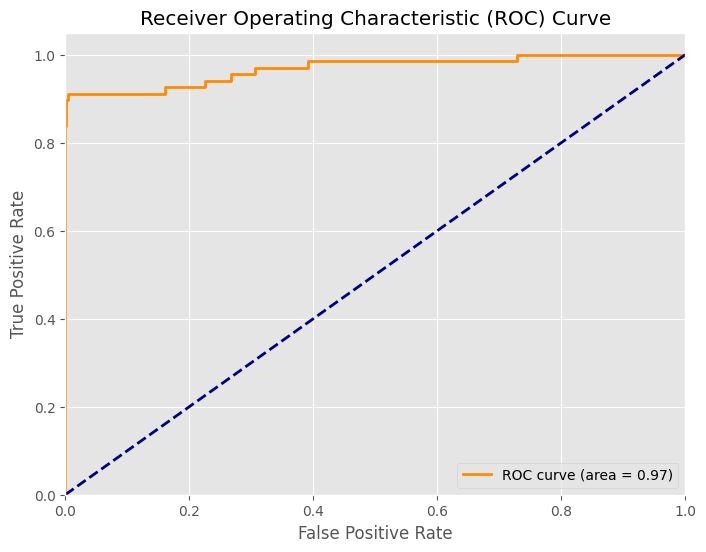

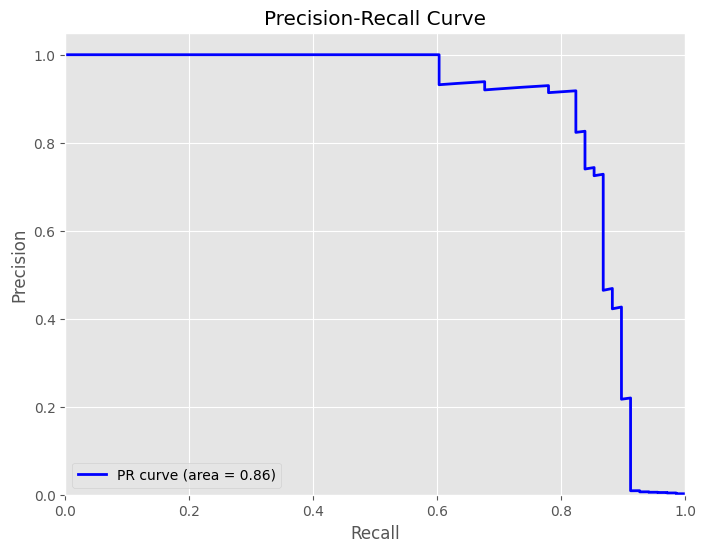

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Assuming y_pred contains predicted probabilities (or scores) for the positive class
# and y_test contains the true binary labels (0 or 1)

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
